In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
np.random.seed(42)

# Preprocessing & models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
rfm = pd.read_csv("C:/Projects/Automobile-Sales-Logistics/Data/Cleaned-Data/rfm_output.csv")

In [3]:
print(rfm.columns.tolist())


['customername', 'recency_days', 'frequency_orders', 'monetary_sales', 'avg_totalmsrp', 'n_unique_products', 'shipping_reliability', 'main_country', 'main_city', 'main_productline', 'main_dealsize', 'R_score', 'F_score', 'M_score', 'RFM_score', 'value_tier', 'ship_bucket', 'value_ship_segment', 'cluster_kmeans', 'cluster_label']


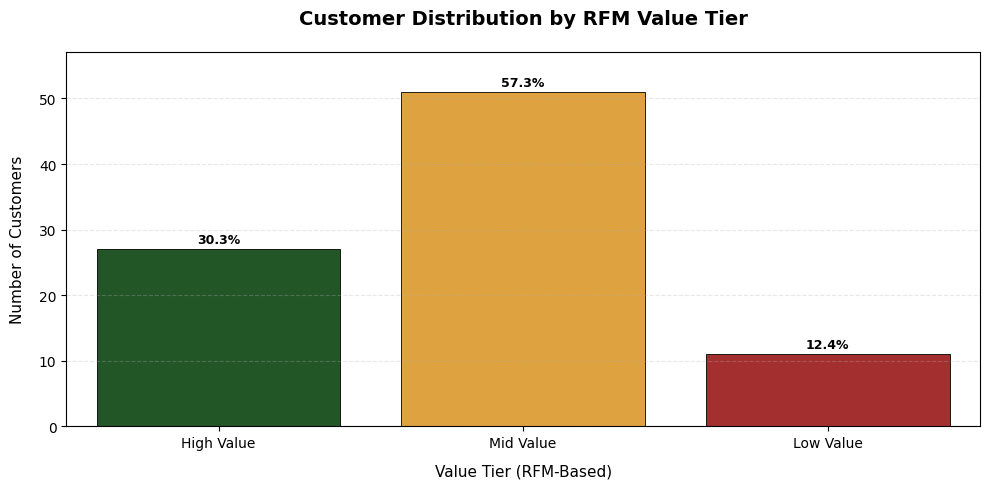

In [4]:


plt.figure(figsize=(10, 5))

# Fixed Business Order
order_vt = ['High Value', 'Mid Value', 'Low Value']

# Corporate Risk Palette (Used in CX & Risk Analytics)
palette_vt = [
    "#1B5E20",  # Executive Green (High Value)
    "#F9A825",  # Business Yellow (Mid Value)
    "#B71C1C"   # Strategic Red (Low Value)
]

ax = sns.countplot(
    data=rfm,
    x='value_tier',
    order=order_vt,
    palette=palette_vt,
    edgecolor='black',
    linewidth=0.6
)

# Title & Labels
plt.title(
    "Customer Distribution by RFM Value Tier",
    fontsize=14,
    fontweight='bold',
    pad=20
)

plt.xlabel("Value Tier (RFM-Based)", fontsize=11, labelpad=10)
plt.ylabel("Number of Customers", fontsize=11, labelpad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Clean Grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# For Spaced Percent Labels
total = len(rfm)
for p in ax.patches:
    count = p.get_height()
    percent = (count / total) * 100
    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    ax.text(
        x,
        y + (total * 0.005),
        f"{percent:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Extra Top Space
ax.margins(y=0.12)

plt.tight_layout()

plt.savefig(
    "C:/Projects/Automobile-Sales-Logistics/Output/Visuals_Plots/Customer Distribution by RFM Value Tier.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

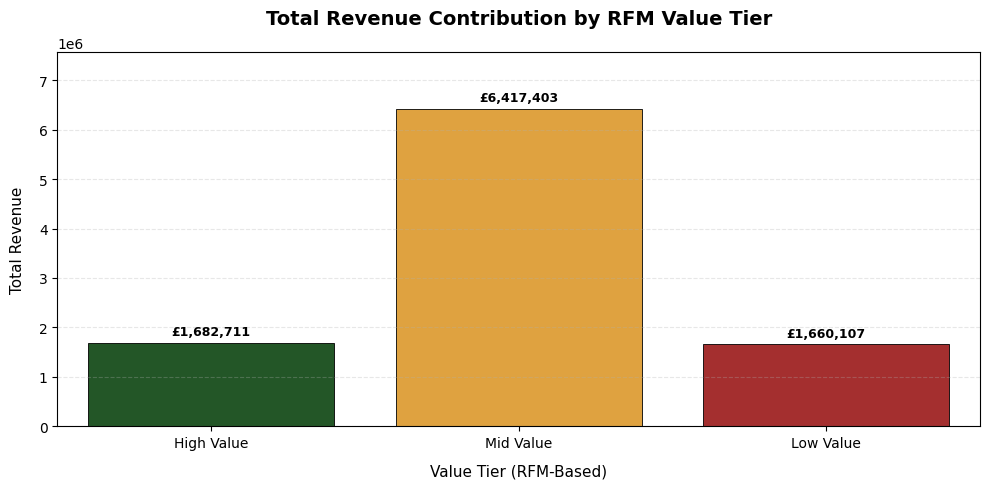

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

value_revenue_plot = (
    rfm.groupby('value_tier')['monetary_sales']
       .sum()
       .reindex(order_vt)
       .reset_index()
)

# ✅ Same Premium Risk Palette (Consistency)
palette_vt = [
    "#1B5E20",  # Executive Green (High Value)
    "#F9A825",  # Business Yellow (Mid Value)
    "#B71C1C"   # Strategic Red (Low Value)
]


ax = sns.barplot(
    data=value_revenue_plot,
    x='value_tier',
    y='monetary_sales',
    order=order_vt,
    palette=palette_vt,
    edgecolor='black',
    linewidth=0.6
)

# ✅ Premium Title & Labels
plt.title(
    "Total Revenue Contribution by RFM Value Tier",
    fontsize=14,
    fontweight='bold',
    pad=20
)

plt.xlabel("Value Tier (RFM-Based)", fontsize=11, labelpad=10)
plt.ylabel("Total Revenue", fontsize=11, labelpad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ✅ Clean Consulting Grid (Y-Axis Only)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# ✅ Executive Revenue Labels (Currency + Comma + Perfect Spacing)
for p in ax.patches:
    value = p.get_height()
    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    ax.text(
        x,
        y + (value_revenue_plot['monetary_sales'].max() * 0.015),
        f"£{value:,.0f}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# ✅ Extra Headroom for Labels
ax.margins(y=0.18)

plt.tight_layout()


plt.savefig(
    "C:/Projects/Automobile-Sales-Logistics/Output/Visuals_Plots/Total Revenue Contribution by RFM Value Tier.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


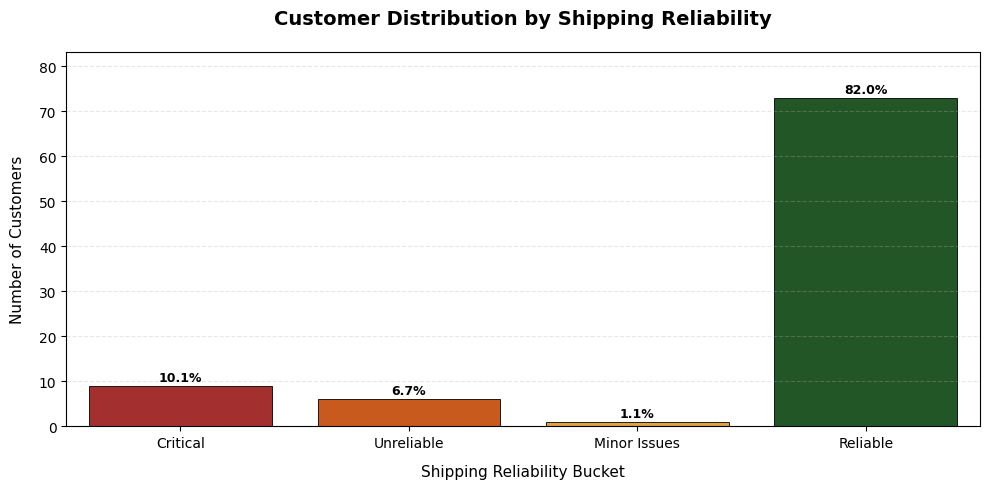

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# ✅ Business Risk Order (Worst → Best)
order_ship = ['Critical', 'Unreliable', 'Minor Issues', 'Reliable']

# ✅ Premium Corporate Risk Palette (Red → Amber → Green)
palette_ship = [
    "#B71C1C",  # Strategic Red (Critical)
    "#E65100",  # Deep Orange (Unreliable)
    "#F9A825",  # Business Yellow (Minor Issues)
    "#1B5E20"   # Executive Green (Reliable)
]

ax = sns.countplot(
    data=rfm,
    
x='ship_bucket',
    order=order_ship,
    palette=palette_ship,
    edgecolor='black',
    linewidth=0.6
)

# ✅ Premium Title & Labels
plt.title(
    "Customer Distribution by Shipping Reliability",
    fontsize=14,
    fontweight='bold',
    pad=20
)

plt.xlabel("Shipping Reliability Bucket", fontsize=11, labelpad=10)
plt.ylabel("Number of Customers", fontsize=11, labelpad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ✅ Clean Consulting Grid (Y-axis only)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# ✅ Perfectly Spaced Percent Labels
total = len(rfm)
for p in ax.patches:
    count = p.get_height()
    percent = (count / total) * 100
    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    ax.text(
        x,
        y + (total * 0.005),
        f"{percent:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# ✅ Extra Headroom for Labels
ax.margins(y=0.14)

plt.tight_layout()



plt.savefig(
    "C:/Projects/Automobile-Sales-Logistics/Output/Visuals_Plots/Customer distribution by Shipping Reliability.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


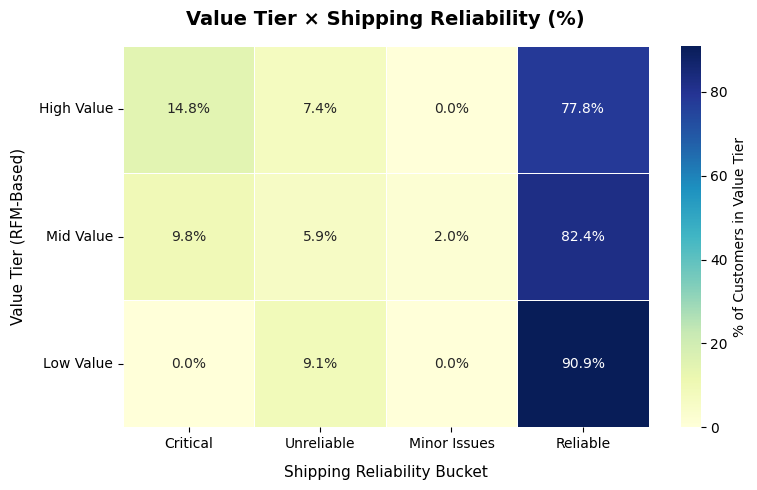

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-tab & row-wise % already ban chuka:
cross_tab = pd.crosstab(rfm['value_tier'], rfm['ship_bucket'])
cross_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# ✅ Order ensure (High → Low, Critical → Reliable)
value_order = order_vt          # ['High Value', 'Mid Value', 'Low Value']
ship_order = order_ship         # ['Critical', 'Unreliable', 'Minor Issues', 'Reliable']

plot_data = cross_percent.loc[value_order, ship_order]

# ✅ Labels with % sign for annotations
annot_labels = plot_data.round(1).astype(str) + "%"

plt.figure(figsize=(8, 5))

ax = sns.heatmap(
    plot_data,
    annot=annot_labels,
    fmt="",                      # because we passed strings in annot
    cmap="YlGnBu",               # clean corporate blue-green
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "% of Customers in Value Tier"}
)

# ✅ Premium Title & Axis Labels
plt.title(
    "Value Tier × Shipping Reliability (%)",
    fontsize=14,
    fontweight='bold',
    pad=15
)

plt.xlabel("Shipping Reliability Bucket", fontsize=11, labelpad=10)
plt.ylabel("Value Tier (RFM-Based)", fontsize=11, labelpad=10)

# ✅ Ticks styling
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()



plt.savefig(
    "C:/Projects/Automobile-Sales-Logistics/Output/Visuals_Plots/Value Tier.png",
    dpi=300,
    bbox_inches="tight"
)


plt.show()


In [8]:
cross_tab = pd.crosstab(rfm['value_tier'], rfm['ship_bucket'])
cross_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# -------------------------
# Simple Business Features
# -------------------------

kmeans_features = [
    'recency_days',
    'frequency_orders',
    'monetary_sales',
    'n_unique_products',
    'shipping_reliability'
]

X = rfm[kmeans_features]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


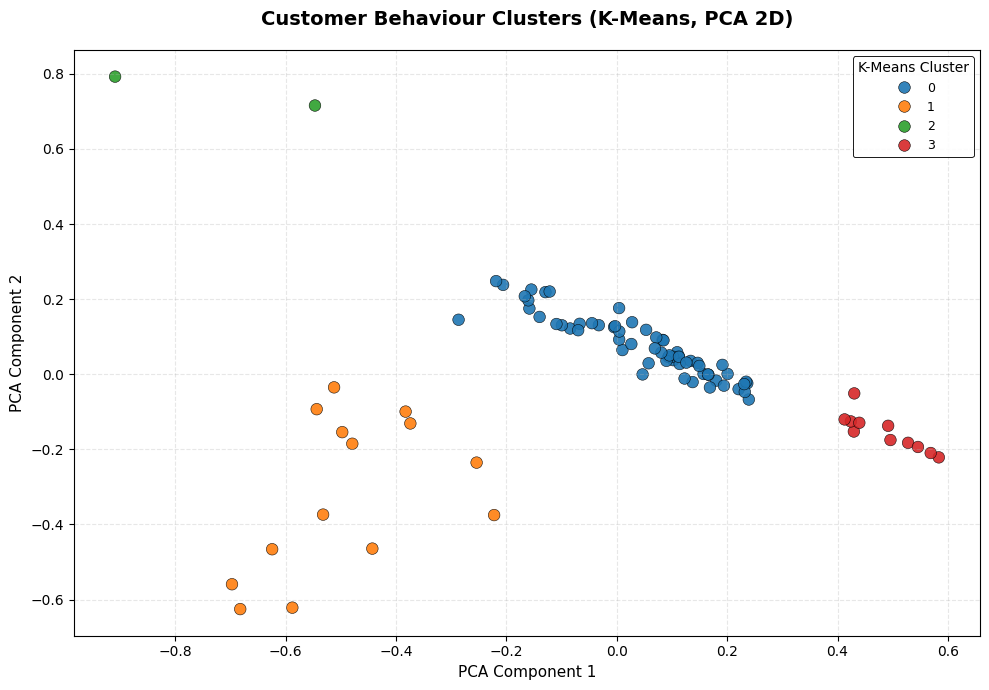

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns



# --- PCA on scaled features (already done) ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

rfm['pca_1'] = X_pca[:, 0]
rfm['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(10, 7))

# ✅ Premium cluster palette (soft but professional)
n_clusters = rfm['cluster_kmeans'].nunique()
palette_clusters = sns.color_palette("tab10", n_colors=n_clusters)

ax = sns.scatterplot(
    data=rfm,
    x='pca_1',
    y='pca_2',
    hue='cluster_kmeans',
    palette=palette_clusters,
    s=70,
    alpha=0.9,
    edgecolor='black',     # sharp look
    linewidth=0.4
)

# ✅ Title & axes
plt.title(
    "Customer Behaviour Clusters (K-Means, PCA 2D)",
    fontsize=14,
    fontweight='bold',
    pad=18
)
plt.xlabel("PCA Component 1", fontsize=11)
plt.ylabel("PCA Component 2", fontsize=11)

# ✅ Clean grid for interpretation
plt.grid(alpha=0.3, linestyle='--')

# ✅ Legend styling (premium look)
legend = plt.legend(
    title="K-Means Cluster",
    fontsize=9,
    title_fontsize=10,
    loc='upper right',
    frameon=True

)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.7)
legend.get_frame().set_alpha(0.9)

plt.tight_layout()


plt.savefig(
    "C:/Projects/Automobile-Sales-Logistics/Output/Visuals_Plots/Customer Behaviour Clusters.png",
    dpi=300,
    bbox_inches="tight"
)


plt.show()
